In [1]:
import pickle
import json
import os
import numpy as np
from bitsets import bitset
from matplotlib import pyplot as plt
import itertools

In [12]:
def visual(task):
    old_exact = list()
    for i in range(1, 101):
        with open(os.path.join('../SV_result', task, 'exact-10', 'Round{}.npy'.format(i)), 'rb') as f:
            old_exact.append(pickle.load(f).tolist())
    old_exact = np.array(old_exact)
    nz_exact = list()
    for i in range(1, 101):
        with open(os.path.join('../SV_result', task, 'non-zero-exact-10', 'Round{}.npy'.format(i)), 'rb') as f:
            nz_exact.append(pickle.load(f).tolist())
    nz_exact = np.array(nz_exact)
    new_exact = list()
    for i in range(1, 101):
        with open(os.path.join('../SV_result', task, 'delta-exact-10', 'Round{}.npy'.format(i)), 'rb') as f:
            new_exact.append(pickle.load(f).tolist())
    new_exact = np.array(new_exact)
    with open(os.path.join('../SV_result', task, 'ideal_max.npy'), 'rb') as f:
        ideal = pickle.load(f)
    coef = np.power(1.0, np.arange(0, 100, 1))
    x = ['client {}'.format(i) for i in range(0, 10)]
    plt.figure(figsize=(12, 8))
    # plt.plot(x, ideal / ideal.sum(), label='SV_ideal')
    plt.plot(x, np.dot(coef, old_exact) / np.dot(coef, old_exact).sum(), label='paper flSV_exact')
    # plt.plot(x, np.dot(coef, nz_exact) / np.dot(coef, nz_exact).sum(), label='nz flSV_exact')
    plt.plot(x, np.dot(coef, new_exact) / np.dot(coef, new_exact).sum(), label='delta flSV_exact')
    plt.legend()
    if 'dist11' in task:
        plt.title('IID')
    else:
        plt.title('Non-IID ' + task.replace('synthetic_classification_cnum10_dist10_skew', '').replace('_seed0', ''))
    plt.show()
    return old_exact, new_exact

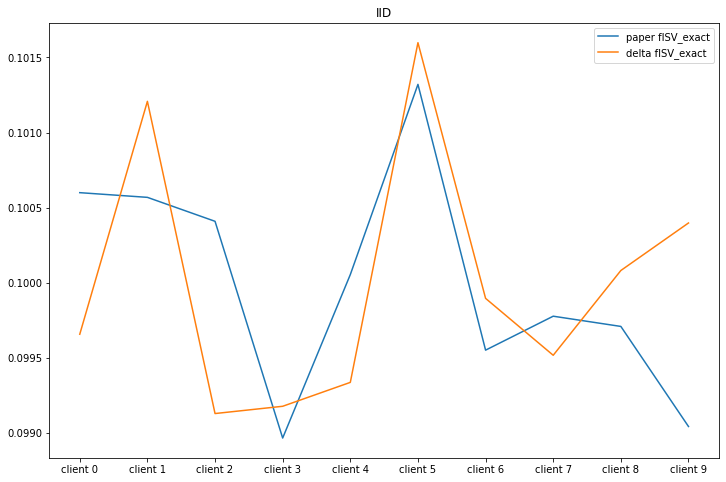

In [14]:
old_exact, new_exact = visual('synthetic_classification_cnum10_dist11_skew1.0_seed0')

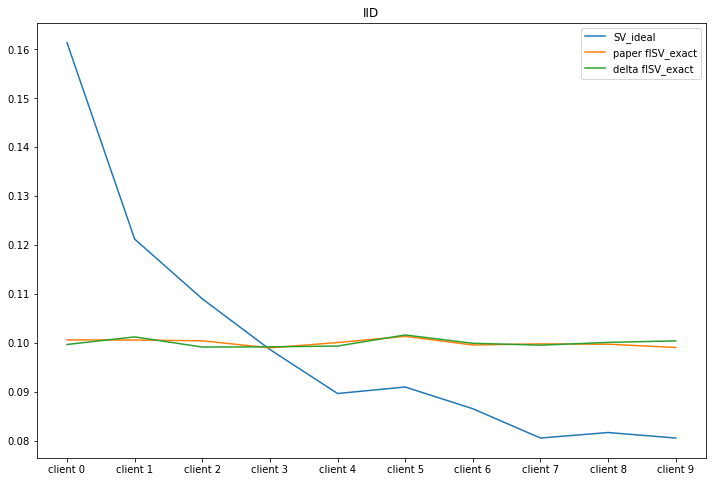

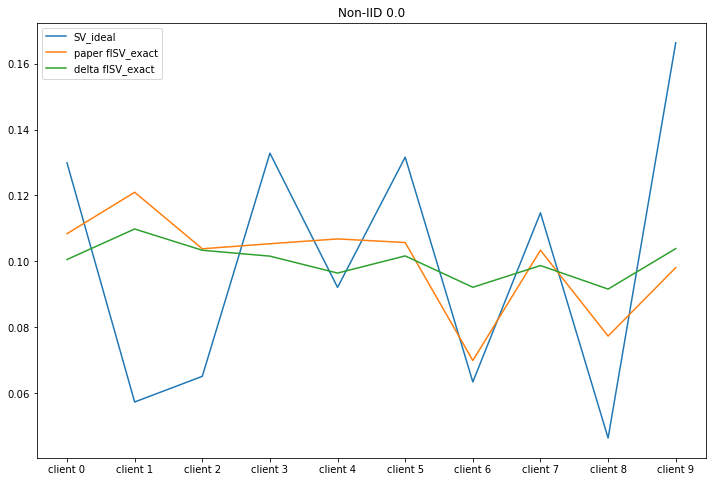

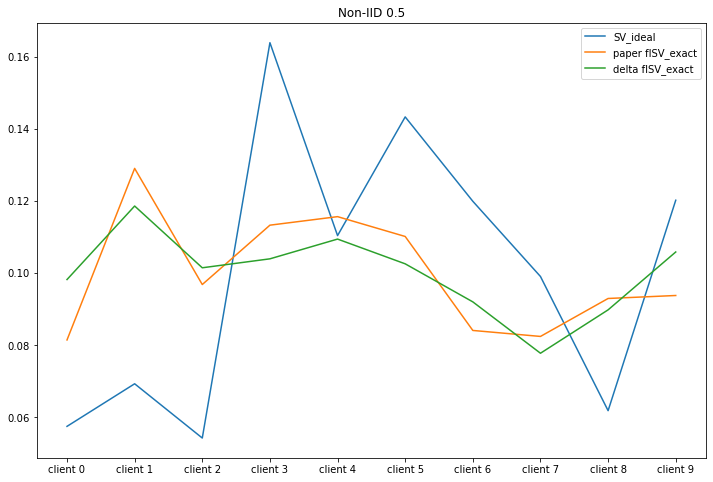

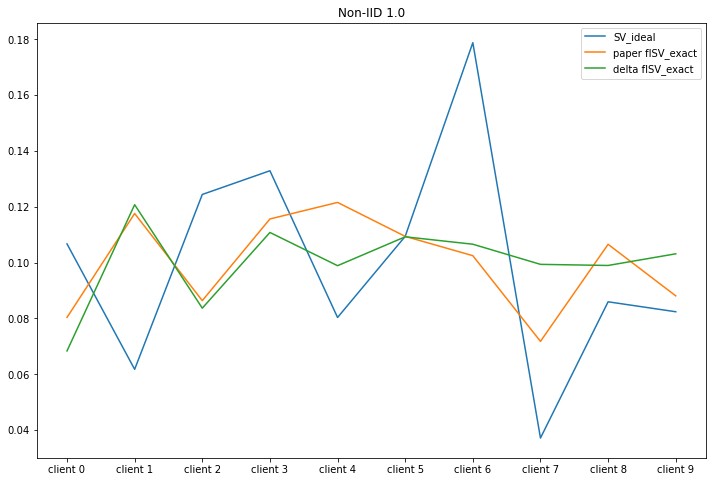

In [5]:
for task in [
    'synthetic_classification_cnum10_dist11_skew1.0_seed0',
    'synthetic_classification_cnum10_dist10_skew0.0_seed0',
    'synthetic_classification_cnum10_dist10_skew0.5_seed0',
    'synthetic_classification_cnum10_dist10_skew1.0_seed0'
]:
    visual(task)